In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering 
import sklearn.metrics as sm

import scipy
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
cars_df = pd.read_csv('mtcars.csv')

In [25]:
cars_df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [28]:
cars_df.rename(columns = {'Unnamed: 0': 'cars_names'}, inplace = True)
cars_df.head()

,cars_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [48]:
X = cars_df.iloc[:, [1, 3, 4, 6]].values
y = cars_df.iloc[:, 9].values

In [49]:
X[:5]

array([[ 21.   , 160.   , 110.   ,   2.62 ],
       [ 21.   , 160.   , 110.   ,   2.875],
       [ 22.8  , 108.   ,  93.   ,   2.32 ],
       [ 21.4  , 258.   , 110.   ,   3.215],
       [ 18.7  , 360.   , 175.   ,   3.44 ]])

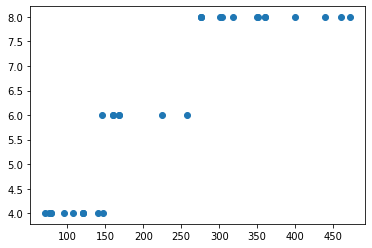

In [50]:
plt.scatter(cars_df.disp, cars_df.cyl, marker = 'o')

In [66]:
k = 2
ac_model = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'ward')

In [76]:
ac_model.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

In [77]:
sm.accuracy_score(y, ac_model.labels_)

0.78125

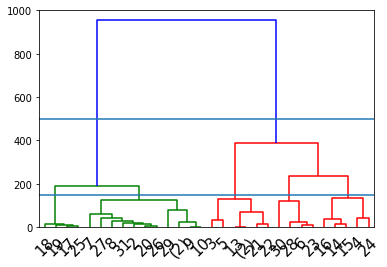

In [78]:
z = linkage(X, 'ward')
dendrogram(z, truncate_mode = 'lastp', leaf_rotation = 45., leaf_font_size = 15., show_contracted = True)

plt.axhline(y=500)
plt.axhline(y=150)

In [79]:
from scipy.spatial import distance_matrix 


In [80]:
dist_matrix = distance_matrix(X, X) 
print(dist_matrix)

[[0.00000000e+00 2.55000000e-01 5.47387431e+01 ... 6.67211548e+01
  2.65599139e+02 3.90151970e+01]
 [2.55000000e-01 0.00000000e+00 5.47407346e+01 ... 6.67210688e+01
  2.65598349e+02 3.90149846e+01]
 [5.47387431e+01 5.47407346e+01 0.00000000e+00 ... 9.00156236e+01
  3.09637534e+02 2.06681301e+01]
 ...
 [6.67211548e+01 6.67210688e+01 9.00156236e+01 ... 0.00000000e+00
  2.23514496e+02 7.02487729e+01]
 [2.65599139e+02 2.65598349e+02 3.09637534e+02 ... 2.23514496e+02
  0.00000000e+00 2.88994090e+02]
 [3.90151970e+01 3.90149846e+01 2.06681301e+01 ... 7.02487729e+01
  2.88994090e+02 0.00000000e+00]]


C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


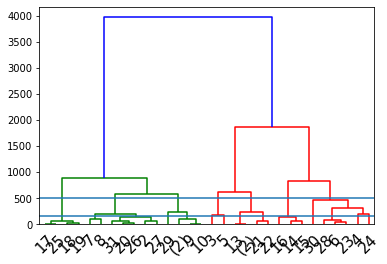

In [81]:
z = linkage(dist_matrix, 'ward')
dendrogram(z, truncate_mode = 'lastp', leaf_rotation = 45., leaf_font_size = 15., show_contracted = True)

plt.axhline(y=500)
plt.axhline(y=150)

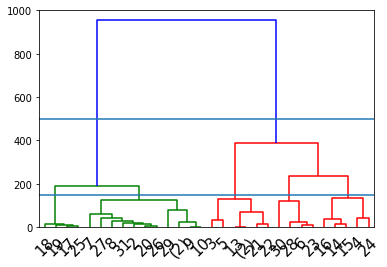

In [82]:
z = linkage(X, 'ward')
dendrogram(z, truncate_mode = 'lastp', leaf_rotation = 45., leaf_font_size = 15., show_contracted = True)

plt.axhline(y=500)
plt.axhline(y=150)